In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import statistics
from statistics import median
from statistics import mean

In [9]:
df = pd.read_csv(r'/Users/morty/Desktop/HCV/HCV.csv')
df

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
0,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,55855.000881,25.631300,25.636757,0.1070,hst_12586_03_acs_wfc_f606w,False,55855.000881,1.093611,55855.000881,6.084347
1,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56001.959890,26.200701,26.195594,0.1815,hst_12586_10_acs_wfc_f606w,False,56001.959890,0.635000,56001.959890,2.961927
2,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56052.841962,26.034100,26.046429,0.1469,hst_12586_22_acs_wfc_f606w,False,56052.841962,0.824907,56052.841962,5.407275
3,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56109.701472,25.735399,25.760180,0.1854,hst_12586_35_acs_wfc_f606w,False,56109.701472,0.933519,56109.701472,4.572665
4,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56121.406559,25.626101,25.640382,0.0986,hst_12586_39_acs_wfc_f606w,False,56121.406559,1.029815,56121.406559,3.149204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576369,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56716.158792,20.118099,20.122682,0.0061,hst_13463_08_wfc3_uvis_f814w,False,56716.158792,1.415333,56716.158792,2.586158
2576370,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56732.954985,20.060400,20.060412,0.0058,hst_13463_12_wfc3_uvis_f814w,False,56732.954985,1.374222,56732.954985,6.504886
2576371,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56764.960344,20.134701,20.137863,0.0063,hst_13463_20_wfc3_uvis_f814w,False,56764.960344,1.420444,56764.960344,4.001287
2576372,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56784.897984,20.104401,20.095573,0.0057,hst_13463_24_wfc3_uvis_f814w,False,56784.897984,1.412222,56784.897984,3.657708


In [10]:
#let's make a fake TDE in our monster matrix
col_names = list(df)


#unique time, mag, and error values
time = [-6, 0, 5, 24, 56, 62]
mag = [17.4, 17, 17.2, 19.2, 19.6, 20]
mag_err = [0.03, 0.05, 0.001, 0.001, 0.2, 0.1]

time_mag_err = tuple(zip(time, mag, mag_err))

#unique matchid
matchid = 80087
#unique groupid
groupid = 1042781

subgroup = 999999999
ra = 197.871282200
dec = -1.346418497

pipeline_class = 999999999
expert_class = 999999999
filter_type = 'ACS_F606W'
num_filters = 1
var_quality_flag = 999999999
filter_detection_flag = 999999999
num_in_lc = len(time)
hsc_mean_mag = mean(mag)
hcv_mean_mag = mean(mag)
mad = 999999999
chi2 = 999999999 
lightcurve_i = 'oscars_da_best'
lightcurve_r = 'FALSE'
ci_d = 999999999
ci_v = 999999999
d_d = 999999999
d_v = 999999999


fake_df_data = {'matchid': [],
 'groupid': [],
 'subgroup': [],
 'ra': [],
 'dec': [],
 'pipeline_class': [],
 'expert_class': [],
 'filter': [],
 'num_filters': [],
 'var_quality_flag': [],
 'filter_detection_flag': [],
 'num_in_lc': [],
 'hsc_mean_mag': [],
 'hcv_mean_mag': [],
 'mad': [],
 'chi2': [],
 'lightcurve_d': [],
 'lightcurve_m': [],
 'lightcurve_cm': [],
 'lightcurve_e': [],
 'lightcurve_i': [],
 'lightcurve_r': [],
 'ci_d': [],
 'ci_v': [],
 'd_d': [],
 'd_v': []}

fake_df = pd.DataFrame(fake_df_data)

for item in time_mag_err:
    fake_df = fake_df.append({'matchid': matchid,
               'groupid': groupid,
               'subgroup': subgroup,
               'ra': ra,
               'dec': dec,
               'pipeline_class': pipeline_class,
               'expert_class': expert_class,
               'filter': filter_type,
               'num_filters': num_filters,
               'var_quality_flag': var_quality_flag,
               'filter_detection_flag': filter_detection_flag,
               'num_in_lc': num_in_lc,
               'hsc_mean_mag': hsc_mean_mag,
               'hcv_mean_mag': hcv_mean_mag,
               'mad': mad,
               'chi2': chi2,
               'lightcurve_d': item[0],
               'lightcurve_m': item[1],
               'lightcurve_cm': item[1],
               'lightcurve_e': item[2],
               'lightcurve_i': lightcurve_i,
               'lightcurve_r': lightcurve_r,
               'ci_d': ci_d,
               'ci_v': ci_v,
               'd_d': d_d,
               'd_v': d_v}, ignore_index = True)
    
fake_df

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
0,80087.0,1042781.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,-6.0,17.4,17.4,0.030,oscars_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
1,80087.0,1042781.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,0.0,17.0,17.0,0.050,oscars_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
2,80087.0,1042781.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,5.0,17.2,17.2,0.001,oscars_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
3,80087.0,1042781.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,24.0,19.2,19.2,0.001,oscars_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
4,80087.0,1042781.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,56.0,19.6,19.6,0.200,oscars_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0
5,80087.0,1042781.0,999999999.0,197.871282,-1.346418,999999999.0,999999999.0,ACS_F606W,1.0,999999999.0,...,62.0,20.0,20.0,0.100,oscars_da_best,FALSE,999999999.0,999999999.0,999999999.0,999999999.0


### Generate Lightcurve Function

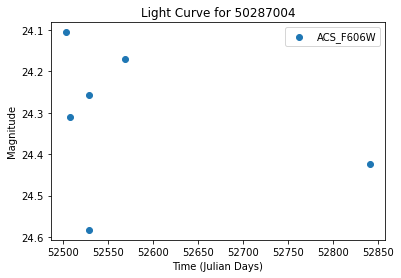

In [11]:
#Similar design as the get_filter function, essentially takes a matchid as input and outputs a scatter plot
#from magnitude and time

def make_lightcurve(matchid):
    mag_list = []
    time_list = []
    tuple_list = []
    filter_list = []
    count = 0
    #plt.figure(figsize = (11,11))
    
    #specify that the dataframe we want is the same as the matchid inputed into our function
    matchid_df = df.loc[df['matchid'] == matchid].reset_index()
    
    for i in range(len(matchid_df) - 1): #len is -1 since updated is i+1, so we'll have it looping through until it
        #gets to the end of our specific filter list
        current_filter = matchid_df['filter'][i] #current filter
        updated_filter = matchid_df['filter'][i+1] #next filter
        
        #Conditions here are if the filters are the same, append it, if i does not equal the last filter, append
        #that, as well. This allows us to continue looping through the matchid dataframe and stop when there's nothing
        #left to append.
        if (current_filter == updated_filter) & (i != len(matchid_df)- 2):
            mag_list.append(matchid_df['lightcurve_m'][i])
            time_list.append(matchid_df['lightcurve_d'][i])
            
            
            count+=1
            
        elif i == (len(matchid_df) - 2):
            mag_list.append(matchid_df['lightcurve_m'][i])
            time_list.append(matchid_df['lightcurve_d'][i])
            mag_list.append(matchid_df['lightcurve_m'][i+1])
            time_list.append(matchid_df['lightcurve_d'][i+1])
            tuple_list.append(list(zip(time_list, mag_list)))
            
            
            #appends updated filter to our list, or the last filter in our matchid
            filter_list.append(updated_filter)

            
            count+=2
            
        else:
            mag_list.append(matchid_df['lightcurve_m'][i])
            time_list.append(matchid_df['lightcurve_d'][i])
            tuple_list.append(list(zip(time_list, mag_list)))
            
            #appends the current filter if current_filter != updated_filter, then will append the updated_filter
            #when the for loop goes back through, until we're left with one final filter which gets appended
            #in the elif statement
            filter_list.append(current_filter)
                        
            count+=1
            
            #clear the lists
            mag_list = []
            time_list = []
            
    #We want two tuples in our list that have all the data points for each filter so that it can plot them separately
    #as different colors.
    #index each value within tuple_list
    for s in range(len(tuple_list)):
        
        #Create a scatter plot of the values within tuple_list, then label them according to the appended filter_list
        #above. The zip and * is to scatter points that are in the form of a list.
        plt.scatter(*zip(*tuple_list[s]), label = filter_list[s])
        plt.xlabel('Time (Julian Days)')
        plt.ylabel('Magnitude')
        plt.title('Light Curve for ' + str(matchid)) 

    #invert y axis since magnitude goes high to low
    plt.gca().invert_yaxis()
    plt.legend()
    #plt.savefig(str(matchid) + '_lightcurve.jpeg')
    plt.show()

make_lightcurve(50287004)

### Helper function to find variable filters

In [12]:
#takes in a monster matrix; outputs list of unique filters that are variable
def find_variable_filters(matchid, monster_matrix):
    #get row correspodning to the input matchid
    matchid_monster_matrix = monster_matrix.loc[monster_matrix['matchid'] == matchid]
    
    #initialize empty list
    variable_filters = []
    
    #find max max mag up, down filters and append
    max_max_mag_up_filter = matchid_monster_matrix['max max mag up filter'].values[0]
    max_max_mag_down_filter = matchid_monster_matrix['max max mag down filter'].values[0]
    
    #see if the filter is one of the filter types in the HCV; i.e. not nan
    #checking if the filter != 'NaN' or 'nan' or np.nan did not work
    filters = df['filter'].unique()
    
    if max_max_mag_up_filter in filters:
        variable_filters.append(max_max_mag_up_filter)
    if max_max_mag_down_filter in filters: 
        variable_filters.append(max_max_mag_down_filter)    
    
    #find unique filters
    unique_filters = list(set(variable_filters))
    
    return unique_filters
    

### Lightcurve given list of max mag up, down filters

In [63]:
#takes in a matchid and list of filters that show variability
def make_lightcurve_variable_filters(matchid, variable_filters):
    #initialize list to hold list of time, mag tuples
    list_list_time_mag_magerr = []
    
    #create dataframe for given matchid
    matchid_df = df.loc[df['matchid'] == matchid].reset_index()
    
    for filter_type in variable_filters:
        #create a df for that matchid/filter combo
        filter_matchid_df = matchid_df.loc[matchid_df['filter'] == filter_type]
        
        #stores list of list of tuples for each filter type, including magnitude and time
        time_mag_magerr_list =[]
        
        #now iterate through this dataframe and save the time, mag tuple to the time_mag_list
        for i in range(len(filter_matchid_df)):
            time_mag_magerr_list.append((filter_matchid_df['lightcurve_d'].values[i], 
                                         filter_matchid_df['lightcurve_m'].values[i],
                                        filter_matchid_df['lightcurve_e'].values[i]))
        
        list_list_time_mag_magerr.append(time_mag_magerr_list)
        
    #now plot!
    for list_time_mag_magerr in list_list_time_mag_magerr:
        for time_mag_magerr in list_time_mag_magerr:
            plt.scatter(time_mag_magerr[0], time_mag_magerr[1])
            plt.errorbar(time_mag_magerr[0], time_mag_magerr[1], yerr = time_mag_magerr[2], fmt = 'o', color = 'blue')
        plt.xlabel('Time (Julian Days)', fontsize=16)
        plt.ylabel('Magnitude', fontsize=16)
        plt.title('Lightcurve for Matchid ' + str(matchid), fontsize=20)
        
    plt.gca().invert_yaxis() #invert y axis since magnitude is inverted; i.e. small magnitude is bright
    plt.legend(variable_filters)
    #plt.savefig('lightcurve_'+str(matchid)+'.jpeg')
    plt.show()
        

### Putting matchids in the form of a list

In [14]:
#turns a groupid into a dictionary that reads back the number of unique matchids it has
def get_dict_matchids_groupid(groupid):
    
    #create a df of the input groupid
    groupid_df = df.loc[df['groupid'] == groupid]
    #find all unique matchids
    unique_matchids = groupid_df.matchid.unique()
    #count them up
    num_unique_matchids = len(unique_matchids)
    #store them in a dictionary
    return {'groupid': groupid, 'num unique matchids': num_unique_matchids}

groupids = df.groupid.unique()

#create a groupid_df dataframe
groupid_data = {'groupid': [], 'num unique matchids': []}
groupid_df = pd.DataFrame(groupid_data)

#append all groupids to a dataframe
for groupid in groupids:
    groupid_df = groupid_df.append(get_dict_matchids_groupid(groupid), ignore_index = True)
    
#locate and create a dataframe of all the groupids that only have one unique matchid    
groupids_1_df = groupid_df.loc[groupid_df['num unique matchids'] == 1].reset_index()
groupids_1_df = groupids_1_df.iloc[:,1:]

#function for turning the unique matchids from a single groupid into a list
def get_list_matchids_groupid(groupid):
    #set a new dataframe of just the input groupid
    groupid_df = df.loc[df.groupid==groupid]
    
    #find all the unique matchids and store them in a list
    return groupid_df.matchid.unique()


def get_matchid_master(groupid_df):
    #our master matchids list
    matchids_master = []
    
    #iterate through each row of groupid_df
    for i in range(len(groupid_df)):
        #storing each unique matchid in a variable, use get_list_matchids_groupid to find these
        matchids_for_groupid = get_list_matchids_groupid(groupid_df['groupid'][i])
        
        #append each matchid to the list
        for matchid in matchids_for_groupid:
            matchids_master.append(matchid)
    
    return matchids_master

get_matchid_master(groupids_1_df)

[6398359,
 17884928,
 24374301,
 26945443,
 38243786,
 45812422,
 50287004,
 55755127,
 69470046]

### Feature Vector Part 1

In [15]:
#define our feature vector for a matchid function, just continuing to manipulate data
def feature_vector_p1(matchid):
    #find the matchid within our dataframe and give it its own variable
    matchid_df = df.loc[df['matchid'] == matchid]
    
    #find all the unique filters associated to that matchid
    unique_filter_list = matchid_df['filter'].unique()
    
    #create two empty lists
    median_mag_list = []
    delta_time = []
    mad_list = []
    chi2_list = []
    
    
    #now we iterate, for each filter within our filter list
    for item in unique_filter_list:
        #find a filter
        matchid_filter_df = matchid_df.loc[matchid_df['filter']==item].reset_index()
        
        #get its lightcurve_d data
        matchid_filter_time_list = list(matchid_filter_df['lightcurve_d'])
        
        #get the min and max time values from our list of lightcurve_d
        min_time = matchid_filter_time_list[0]
        max_time = matchid_filter_time_list[-1]
        
        #find the difference
        total_time_diff = max_time-min_time
        #append this difference
        delta_time.append(total_time_diff)
        
        #appending the median mag values for each lightcurve
        median_mag = median(matchid_filter_df['lightcurve_m'].values)
        median_mag_list.append(median_mag)
        
        mad_list.append(matchid_filter_df['mad'].values[0])
        chi2_list.append(matchid_filter_df['chi2'].values[0])
        
        num_unique_filter_list = len(unique_filter_list)
        
    #find the maximum, minimum, and median of the median magnitude lists
    max_median_mag = min(median_mag_list)
    min_median_mag = max(median_mag_list)
    median_median_mag = median(median_mag_list)
    
    #find the index of our filter within the mean_mag_list for max and min
    #max_mean_mag_index = mean_mag_list.index(max_mean_mag)
    #max_mean_mag_filter = unique_filter_list[max_mean_mag_index]
    
    #min_mean_mag_index = mean_mag_list.index(min_mean_mag)
    #min_mean_mag_filter = unique_filter_list[min_mean_mag_index]
    
    #find the minimum delta time for our list
    min_total_time = min(delta_time)
    max_total_time = max(delta_time)
    
    #compute medians for MAD and chi2
    median_mad = median(mad_list)
    median_chi2 = median(chi2_list)
    
    
    #now do it for time
    #max_total_time_index = delta_time.index(max_total_time)
    #max_total_time_filter = unique_filter_list[max_total_time_index]
    
    #min_total_time_index = delta_time.index(min_total_time)
    #min_total_time_filter = unique_filter_list[min_total_time_index]
    
    
    #function to find galactic coordinates from ra and dec, these change every 26000 years, so make sure you update!
    def galactic_coordinates(wx, wy):
        #conversion function
        c = SkyCoord(ra=wx*u.degree, dec=wy*u.degree, frame='icrs')
        #returns in the form of degrees for galactic longitude and latitude
        return c.galactic.l.deg, c.galactic.b.deg
    
    #extract ra and dec of the object and convert it into galactic coordinates, need .values to get it in the form
    #of a dataframe
    ra, dec = matchid_df.ra.values[0], matchid_df.dec.values[0]
    
    #set our galactic coordinates
    l, b = galactic_coordinates(ra, dec)
    
    #this will count all of the matchids that share a groupid
    groupid = matchid_df.groupid.values[0]
    matchids_groupid_list = get_list_matchids_groupid(matchid_df.groupid.values[0])
    num_other_matchids_groupid = len(matchids_groupid_list)-1
    
    #return it as a dictionary (easy to print and then easy to create into a dataframe that way)
    return {'matchid': matchid, 'groupid': groupid, 'number of matchids sharing groupid': num_other_matchids_groupid
            , 'num unique filters': num_unique_filter_list, 'min median mag': min_median_mag
            , 'max median mag': max_median_mag, 'median median mag': median_median_mag
            , 'median mad': median_mad, 'median chi2': median_chi2
            , 'min delta T': min_total_time, 'max delta T': max_total_time
            , 'RA': ra, 'DEC': dec, 'galactic longitude': l, 'galactic latitude': b}

feature_vector_p1(12670)

{'matchid': 12670,
 'groupid': 33470,
 'number of matchids sharing groupid': 1420,
 'num unique filters': 3,
 'min median mag': 23.159000000000002,
 'max median mag': 20.755000000000003,
 'median median mag': 22.0058,
 'median mad': 0.0434359394147954,
 'median chi2': 7.129302546930129,
 'min delta T': 1.204467604176898,
 'max delta T': 1.2426042708102614,
 'RA': 138.01878356933594,
 'DEC': -64.86891174316406,
 'galactic longitude': 282.1988241347117,
 'galactic latitude': -11.25437364603963}

### Fluid Noise Threshold using CASJOBs to bin and find it

In [16]:
#import our SWEEPS csv from our casjobs tutorial
sweeps = pd.read_csv(r'/Users/morty/Desktop/HCV/Resolved HSC Targets/SWEEPS6_ghirsch.csv')

#first split up the sweeps df by filter: F606W and F814W
#use .filter to create new dataframes with select columns
sweeps_606df = sweeps.filter(['ObjID', 'RA', 'Dec', 'a_f606w', 'a_f606w_n', 'a_f606w_mad'], axis = 1)
sweeps_814df = sweeps.filter(['ObjID', 'RA', 'Dec', 'a_f814w', 'a_f814w_n', 'a_f814w_mad'], axis = 1)

#our bins
mag_bin_list = []
min_mag = 18.9
max_mag = 27
#define 29 bins
n_bins = 29
step = (max_mag-min_mag)/n_bins

current_mag = min_mag
while current_mag <= max_mag:
    if current_mag + step <= max_mag:
        mag_tuple = (current_mag, current_mag+step)
        mag_bin_list.append(mag_tuple)
    current_mag+=step

#empty dataframe to hold all of our bins and thresholds
threshold_bins_data = {'min mag': [], 'max mag': [], 'mmad 606': [], 'mmad 814': []
                       , 'num pts 606': [], 'num pts 814': []}
threshold_bins_df = pd.DataFrame(threshold_bins_data)

#for each tuple within mag_bin_list get a dataframe from sweeps where the magnitude is in between the values of our
#tuples
for mag_bin in mag_bin_list:
    
    mag_bin_average_606_df = sweeps_606df.loc[(sweeps_606df['a_f606w'] > mag_bin[0]) & 
                                              (sweeps_606df['a_f606w'] <= mag_bin[1])]
    mag_bin_average_814_df = sweeps_814df.loc[(sweeps_814df['a_f814w'] > mag_bin[0]) & 
                                               (sweeps_814df['a_f814w'] <= mag_bin[1])]
    
    #check to see if there are any values within our dataframes
    if (len(mag_bin_average_606_df) != 0) & (len(mag_bin_average_814_df) != 0):
    
        mad_606 = mag_bin_average_606_df['a_f606w_mad'].values
        mad_814 = mag_bin_average_814_df['a_f814w_mad'].values

        median_mad_606 = median(mad_606)
        median_mad_814 = median(mad_814)

        threshold_bins_df = threshold_bins_df.append({'min mag': mag_bin[0], 'max mag': mag_bin[1], 
                                                    'mmad 606': median_mad_606, 'mmad 814': median_mad_814
                                                      , 'num pts 606': len(mad_606), 'num pts 814': len(mad_814)}
                                                     , ignore_index = True)
    
    else:
        print('there is no data for this bin: ' + str(mag_bin))
        print()
        threshold_bins_df = threshold_bin_df.append({'min mag': mag_bin[0], 'max mag': mag_bin[1], 
                                                    'mmad 606': 99999, 'mmad 814': 99999
                                                     , 'num pts 606': 0, 'num pts 814': 0}, ignore_index = True)
        
threshold_bins_df = pd.read_csv(r'/Users/morty/Desktop/HCV/threshold_bins_df.csv')
threshold_bins_df = threshold_bins_df.iloc[:,1:]

threshold_bins_df

,min mag,max mag,mmad 606,mmad 814,num pts 606,num pts 814
0,18.900000,19.179310,0.023000,0.020900,2661.0,7030.0
1,19.179310,19.458621,0.025600,0.019100,3754.0,10132.0
2,19.458621,19.737931,0.022699,0.018700,5077.0,12379.0
3,19.737931,20.017241,0.020400,0.018849,7767.0,14755.0
4,20.017241,20.296552,0.019901,0.019150,11922.0,17151.0
5,20.296552,20.575862,0.019400,0.019550,13366.0,18845.0
6,20.575862,20.855172,0.018901,0.020100,14530.0,20940.0
7,20.855172,21.134483,0.019200,0.020775,15961.0,22504.0
8,21.134483,21.413793,0.019650,0.021799,17144.0,23998.0
9,21.413793,21.693103,0.020500,0.022650,18054.0,24848.0


### Create the noise function by running a least squares polynomial regression on the above data

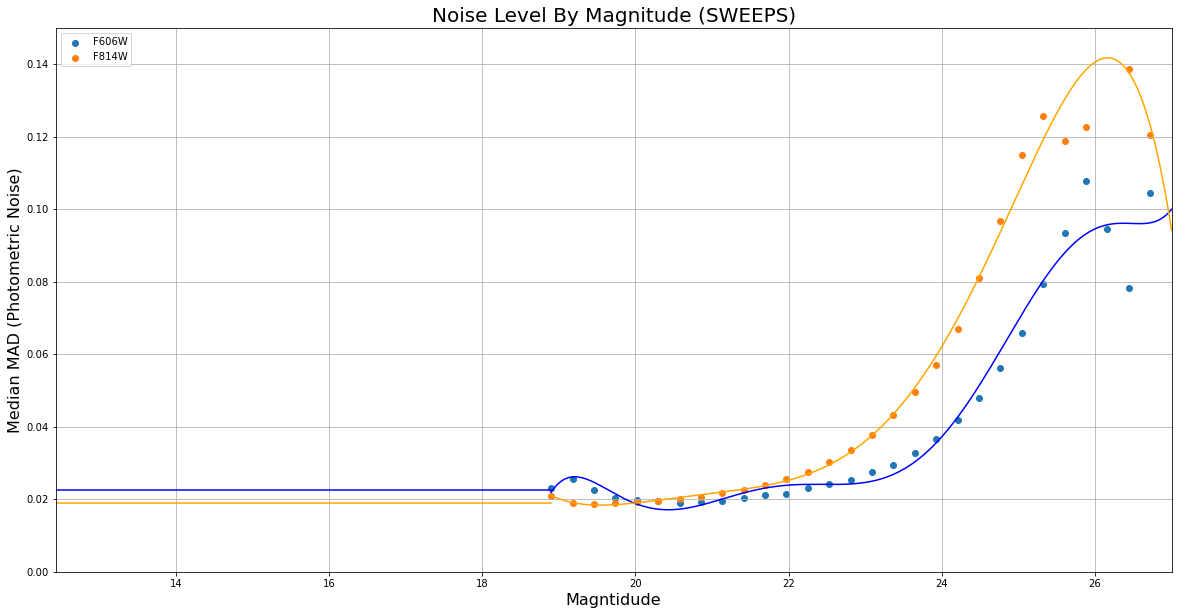

In [9]:
plt.figure(figsize = (20, 10))
#run a least squares polynomial regression on the above data to create the noise function

#prep data---------
#get list of magnitudes
mag_list = list(threshold_bins_df['min mag'].values)

#get list of 606,814 median mad
median_mad_606 = list(threshold_bins_df['mmad 606'].values)
median_mad_814 = list(threshold_bins_df['mmad 814'].values)

# Train Algorithm (Polynomial)
degree = 7
noise_606 = np.poly1d(np.polyfit(mag_list,median_mad_606, degree))
noise_814 = np.poly1d(np.polyfit(mag_list,median_mad_814, degree))

#find median of first 5 bins for 606 and 814 and have this be constant threshold for 12.43 to 18.9
median_5_606 = median(median_mad_606[:5])
median_5_814 = median(median_mad_814[:5])

@np.vectorize
def constant(value, x):
    return value

#define linspaces
xx0 = np.linspace(12.43, 18.9, 1000)
xx = np.linspace(18.9, 27, 1000)

#plot constant data
plt.plot(xx0,constant(median_5_606, xx0), c='b', linestyle='-')
plt.plot(xx0,constant(median_5_814, xx0), c='orange', linestyle='-')

#plot regression data
plt.plot(xx, noise_606(xx), c='b',linestyle='-')
plt.plot(xx, noise_814(xx), c='orange',linestyle='-')

plt.title('Noise Level By Magnitude (SWEEPS)', fontsize=20)
plt.xlabel('Magntidude', fontsize=16)
plt.ylabel('Median MAD (Photometric Noise)', fontsize=16)
plt.axis([12.43, 27, 0, 0.15])
plt.grid(True)

plt.scatter(mag_list, median_mad_606, label = 'F606W')
plt.scatter(mag_list, median_mad_814, label = 'F814W')

plt.legend()
#plt.savefig('sweeps_noise.jpeg')
plt.show()
#print(noise_606(22))

### Get threshold (aka fluid noise) function

In [10]:
#edited get_threshold function
def get_threshold(matchid, filter_type):
    #we first need to find median median mad of the object as well as its filter type
    #create df of matchid and filter
    filter_matchid_df = df.loc[(df['matchid'] == matchid) & (df['filter'] == filter_type)]
    
    #now get a list of the lightcurve m values and compute the median to find median mag
    lightcurve_m_list = filter_matchid_df['lightcurve_m'].values
    median_mag = median(lightcurve_m_list)
    
    #606 filter
    if (filter_type == 'ACS_F606W') or (filter_type=='WFC3_F606W'):
        #constant level
        if (median_mag >= 12.43) and (median_mag <= 18.9):
            #if constant, use the median for the first five bins within the 606 filter
            return median_5_606
        #variable magnitudes (within the noise threshold)
        elif (median_mag >= 18.9) and (median_mag < 26.72):
            #median_mag fit using np.polyfit
            return noise_606(median_mag)
    #814 filter
    elif (filter_type == 'ACS_F814W') or (filter_type=='WFC3_F814W'):
        #constant level
        if (median_mag >= 12.43) and (median_mag <= 18.9):
            #if constant, use the median for the first five bins within the 814 filter
            return median_5_814
        #variable magnitudes (within the noise threshold)
        elif (median_mag >= 18.9) and (median_mag < 26.72):
            #median_mag fit using np.polyfit
            return noise_814(median_mag)
    else:
        print('object ' + str(matchid)+' filter '+ str(filter_type)+ ' mag '+ str(median_mag)+' does not fit in a bin')
        print()
        return 99999
        


### Classifier, breaking up the classifier, and classifying pairs

In [11]:
def make_classified(matchid, list_of_tuples, threshold):
    #defining our classified string that holds the result of +-0
    #by default start with a #
    classified = '#'
        
    #initialize list to hold starting time, delta time, and delta mag for each character
    t_dt_dm = []
        
    #a for loop to iterate over the (time, mag) tuples and calculate pointwise difference
    #subtract 2 so we don't compare the last index to a nonexistant index
    for i in range(len(list_of_tuples) - 1):
        
        #find initial time value
        t0 = list_of_tuples[i][0]
        #find delta m and delta t
        dm = list_of_tuples[i][1] - list_of_tuples[i+1][1]
        dt = list_of_tuples[i+1][0] - t0

        #case 1 is when the delta mag is above the threshold
        if (abs(dm) >= threshold) & (dm > 0):
            classified += '+'

        #case 2 is when the delta mag is the exact same as the threshold, very rare
        elif (abs(dm) >= threshold) & (dm == 0):
            classified += '0'
            
        #case 3 is when the delta mag is less than the threshold, meaning it's less than 0 and below the [i] point    
        elif (abs(dm) >= threshold) & (dm < 0):
            classified += '-'
       
        #this is just an else statement if all else fails, we put in a 0 which should never happen
        else:
            classified += '0'
        
        #append a tuple of starting time, delta t, and delta mag to an event list
        t_dt_dm.append((t0, dt, dm))
        
    #return our classified string, as well as the time, delta mag, and delta time for each character 
    return classified, t_dt_dm
'''

#breaking up the total classify string into pairs 
#don't want to break it up this way anymore, too arbitrary...
def breakup(classified):
    pairs_list = []
    
    for i in range(len(classified)-1):
        first = classified[i]
        second = classified[i+1]
        
        pair = first + second
        pairs_list.append(pair)
        
    return pairs_list

#classifying pairs from our breakup string

def classify_pairs(pair):
    
    #list of conditions for flare up, flare down, flare up down, flare down up, and flat
    first = pair[0]
    second = pair[1]
    
    #flare up
    if (((first == '#') & (second == '+')) or ((first == '0') & (second == '+')) or ((first == '+') & (second == '+'))):
        #return a string indicating the classification
        return 'Flare Up'
    
    #up stop
    elif (((first == '+') & (second == '0')) or ((first == '+') & (second == '-'))):
        return 'Up Stop'
       
    #flare down
    elif (((first == '#') & (second == '-')) or ((first == '0') & (second == '-')) or ((first == '-') & (second == '-'))):
        #return a string indicating the classification
        return 'Flare Down'
    
    #down stop
    elif (((first == '-') & (second == '0')) or ((first == '-') & (second == '+'))):
        return 'Down Stop'
    
    #flat top
    else:
        return 'Flat'
        
'''

#RIP Lone Ranger

#given a list of classifed pairs and a list of tuples of start time, delta t, and delta mag that corresponds to each
#of the right characters in the pair, it'll return a list of flare up, flare down, and flat that consolidateds
#multiple events into distinct unique events, and record a list of tuples of total delta t and total detal mag
def consolidate_events(classified, t_dt_dm):
    
    #initialize lists to hold starting time, delta time, and delta mag
    flare_up_list = []
    flare_down_list = []
    flat_list = []
    #initialize our variables
    t0 = 0
    dt = 0
    dm = 0
    
    i = 0
    
    classified = classified.replace('#', '')
    
    #iterate through all classified pairs
    while i < len(classified):
        #assign t_dt_dm to each specific variable
        t0 = t_dt_dm[i][0]
        dt = t_dt_dm[i][1]
        dm = t_dt_dm[i][2]
        #lets check +, -, 0
        #now combine our ups, downs, and flats
        if classified[i] == '+':
            
            #this is if a flare up is the final character
            if i == len(classified)-1:
                flare_up_list.append((t0, dt, dm))
                        
            #need this else statement when the above is not true, when the last character is not a flare up
            else:
            
                #lets start indexing at i+1 because we want to check the next index
                for j in range(i+1, len(classified)):
                    #if we're down
                    if classified[j] == '+':
                        #add times and magnitudes to the overal delta time and delta mag
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]
                        
                        if j == len(classified)-1:
                            flare_up_list.append((t0, dt, dm))
                            
                            #increment i by however many indexes we got through in our sub loop
                            i+=(j-i)
                            break

                    else:
                        #append and reset
                        flare_up_list.append((t0, dt, dm))

                        t0 = 0
                        dt = 0
                        dm = 0
                        
                        #increment i by however many indexes we got through in our sub loop
                        i += (j-i-1)
                        #break from the for loop
                        break
        
        #for the down
        elif classified[i] == '-':
            
            #this is if a flare down is the final character
            if i == len(classified)-1:
                flare_down_list.append((t0, dt, dm))
            
            #need this else statement when the above is not true, when the last character is not a flare down
            else:
            
                #lets start indexing at i+1 because we want to check the next index
                for j in range(i+1, len(classified)):
                    #if we're down
                    if classified[j] == '-':
                        #add times and magnitudes to the overal delta time and delta mag
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]
                        
                        if j == len(classified)-1:
                            flare_down_list.append((t0, dt, dm))
                            
                            #increment i by however many indexes we got through in our sub loop
                            i+=(j-i)
                            break

                    else:
                        #append and reset
                        flare_down_list.append((t0, dt, dm))

                        t0 = 0
                        dt = 0
                        dm = 0
                        
                        #increment i by however many indexes we got through in our sub loop
                        i += (j-i-1)
                        #break from the for loop
                        break

        else:
            #this is if a flat is the final character
            if i == len(classified)-1:
                flat_list.append((t0, dt, dm))
                
            #need this else statement when the above is not true, when the last character is not a flat   
            else:
                #lets start indexing at i+1 because we want to check the next index
                for j in range(i+1, len(classified)):
                    #if we're flat
                    if classified[j] == '0':
                        #add times and magnitudes to the overal delta time and delta mag
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]
                        
                        if j == len(classified)-1:
                            flat_list.append((t0, dt, dm))
                            
                            #increment i by however many indexes we got through in our sub loop
                            i+=(j-i)
                            break

                    else:
                        #hit something different so we append and then move on
                        flat_list.append((t0, dt, dm))

                        t0 = 0
                        dt = 0
                        dm = 0
                        
                        #increment i by however many indexes we got through in our sub loop
                        i += (j-i-1)
                        #break from the for loop
                        break
        i+=1
    return flare_up_list, flare_down_list, flat_list
    

### Classifying our classified curves

In [12]:
def master_classifier(matchid, list_of_tuples, filter_type):
    #retrieves the threshold value from our function
    threshold = get_threshold(matchid, filter_type)
    
    #generate classified string and our list, two variables!
    classified, t_dt_dm = make_classified(matchid, list_of_tuples, threshold)
        
    #call consolidate_events function to return our list of list of tuples for flare up, down, and flat
    #each list will hold this tuple along with delta t and delta mag
    flare_up_list, flare_down_list, flat_list = consolidate_events(classified, t_dt_dm)
        
    #return lists for each event type
    return flare_up_list, flare_down_list, flat_list

### Classifying our lightcurves

In [13]:
#trying to make a function that takes in a matchid and looks at the filter for each one, then for each unique filter
#a dataframe is created that just has the matchid and filter data
#then create a blank list that stores our time_mag tuples, for each row in this df, append a tuple of the time and mag
#at each row, then append this list of tuples to a larger list and pass that list into the classifier function
def implement_classifier(matchid):
    
    #big boy list
    list_list_time_mag = []
    
    #create matchid_df
    matchid_df = df.loc[df['matchid'] == matchid].reset_index()
    
    #get all unique filters
    unique_filter_list = matchid_df['filter'].unique()
    
    #for each item within this unique filter list
    for item in unique_filter_list:
        
        #create a df for each filter that goes with the matchid
        filter_matchid_df = matchid_df.loc[matchid_df['filter'] == item]
        
        #create an empty time_mag list
        time_mag_list = []
        
        #iterate through each row in the filter matchid df
        for i in range(len(filter_matchid_df)):
            
            #append the lightcurve d and lightcurve m values to the time_mag list
            time_mag_list.append((filter_matchid_df['lightcurve_d'].values[i], filter_matchid_df['lightcurve_m'].values[i]))
            
            
        #then append these tuples to the larger list as a whole     
        list_list_time_mag.append(time_mag_list)
        
        #create an empty classifier list
        master_up = []
        master_down = []
        master_flat = []
        
        #enumerate allows us to log both the index and the value in whatever we're iterating over
        for i, time_mag in enumerate(list_list_time_mag): #for each list of tuples in tuple list
            
            filter_type = unique_filter_list[i]
                        
            flare_up_list, flare_down_list, flat_list = master_classifier(matchid, time_mag, filter_type)
            
            master_up.append(flare_up_list)
            master_down.append(flare_down_list)
            master_flat.append(flat_list)
        
    return master_up, master_down, master_flat, unique_filter_list

[[(56001.95988980192, 119.44666917482391, 0.5746000000000002), (56137.22979974769, 19.557338400518347, 0.10709899999999806), (56384.87516400241, 92.77599102981185, 0.7304989999999982), (56512.400358241975, 15.615630733787839, 0.14980100000000007), (56544.717852972215, 36.20633173827082, 0.45179999999999865), (56716.07207293856, 126.39419328466465, 0.3348009999999988)], [(56206.61132937041, 126.57155343169143, 0.5981009999999998), (56544.69707756839, 16.76064814579877, 0.19229899999999844), (56595.45736798155, 137.36465928470716, 0.7049999999999983), (56858.02174066659, 18.76273235073313, 0.13060000000000116), (56910.09658017032, 32.272888504201546, 0.4429000000000016)]]
5

[[(55855.000881456064, 146.95900834585336, -0.5694010000000027), (56206.59039193974, 178.28477206267416, -0.5382999999999996), (56477.651155032225, 34.7492032097507, -0.2408999999999999), (56528.01598897576, 16.70186399645172, -0.44469999999999743), (56595.47855447442, 120.59351846413483, -0.4119020000000013), (56842

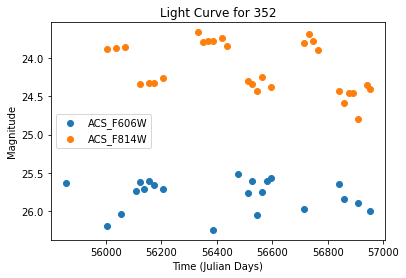

In [14]:
classified_list = implement_classifier(352)
for event_list in classified_list:
    print(event_list)
    print(len(event_list[1]))
    print()
        
make_lightcurve(352)

### Building Feature Vector Part 2, Helper Functions

In [15]:
#helper function to return the index of the max value of a list of tuples
def get_max_index_tuple(tuple_list, tuple_index, max_value):
    for i, value in enumerate(tuple_list):
        #if we've reached the desired max value for the given tuple_index, return the index
        if value[tuple_index] == max_value:
            return i
    #if we don't return any index through the for loop then return nan
    return np.nan

#function takes in list of lists of index, tuple corresponding to max up, max down
#and lists of master_up, master_down, master_flat
#returns the duration of flat after max flare up, before max flare down
def flat_dur_after_before_max(index_tuple_list, master_up, master_down, master_flat):
    #get the indicies of max max mag up, down from our index_tuple_list
    up_index = index_tuple_list[0][0]
    down_index = index_tuple_list[1][0]
    
    up_tuple = index_tuple_list[0][1]
    down_tuple = index_tuple_list[1][1]
    
    #if there is no up or down:
    if (up_index == 99999) and (down_index == 99999):
        return 99999
    
    #if only up, no down:
    elif (up_index != 99999) and (down_index == 99999):
        #get list from masters corresponding to the up index
        up_list = master_up[up_index]
        flat_list = master_flat[up_index]
        
        #check if our flat list is empty, if yes then 0 duration before or after the max
        if len(flat_list) == 0:
            return 0
        
        else:
            #go thru each element in up_list and flat_list and append 'up', 'max up' or 'flat' as the first element
            #of a list, second element being the tuple
            up_labeled_list = []
            for up in up_list:
                #if this tuple is not the max tuple, then just add up
                if up != up_tuple:
                    up_labeled_list.append(['up', up])
                
                #if it is the max tuple, add max up
                else:
                    up_labeled_list.append(['max up'], up)
                    
            flat_labeled_list = []
            for flat in flat_list:
                flat_labeled_list.append('flat', flat)
                
            #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
            complete_labeled_list = up_labeled_list + flat_labeled_list
            complete_labeled_list.sort(key=lambda item: item[1][0])
            
            #check if a flat event occurs after max up
            #first find index of 'max up'
            up_sorted_index = 99999
            for i, event in enumerate(complete_labeled_list):
                if event[0] == 'max up':
                    up_sorted_index = i
                    
            #check if there is a flat on right side of max up
            #if first index, only check to the right
            if up_sorted_index == 0:
                #if we find a flat to the right, return the duration (index 1 of tuple, which is index 1 within the sublist)
                if complete_labeled_list[1][0] == 'flat':
                    return complete_labeled_list[1][1][1]
                else:
                    return 0
            #if index is len of list -1, then no event can follow, so return 0
            elif up_sorted_index == len(complete_labeled_list)-1:
                return 0
            #else check i+1
            else:
                #right is flat, return duration
                if complete_labeled_list[up_sorted_index+1][0] == 'flat':
                    return complete_labeled_list[up_sorted_index+1][1][1]
                #no flats
                else:
                    return 0
                
    #no ups, only down    
    elif (up_index==99999) and (down_index!=99999):
        #get list from masters corresponding to the down index
        down_list = master_down[down_index]
        flat_list = master_flat[down_index]
        
        #check if flat list is empty; if yes, then 0 duration before down
        if len(flat_list)==0:
            return 0
        
        else:
            #go thru each element in down_list and flat_list and append 'down', 'max down' or 'flat' as the first element
            #of a list, second element being the tuple
            down_labeled_list = []
            for down in down_list:
                #if this tuple is not the max tuple, then just add down
                if down != down_tuple:
                    down_labeled_list.append(['down', down])
                #if it is the max tuple, add max down
                else:
                    down_labeled_list.append(['max down', down])
                
            flat_labeled_list = []
            for flat in flat_list:
                flat_labeled_list.append(['flat', flat])
                
            #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
            complete_labeled_list = down_labeled_list + flat_labeled_list
            complete_labeled_list.sort(key=lambda item: item[1][0])
            
            #check if a flat event occurs before or after max down
            #first find index of 'max down'
            down_sorted_index = 99999
            for i, event in enumerate(complete_labeled_list):
                if event[0]=='max down':
                    down_sorted_index = i
            
            #check if there is a flat on either side of max down
            #if first index, there can be no events to left, so return 0
            if down_sorted_index == 0:
                return 0
            #if index is len of list -1, just check to the left
            elif down_sorted_index == len(complete_labeled_list)-1:
                if complete_labeled_list[-2][0]=='flat':
                    return complete_labeled_list[-2][1][1]
                else:
                    return 0
            #else check i-1
            else:
                #left is flat, return left duration
                if complete_labeled_list[down_sorted_index-1][0]=='flat':
                        return complete_labeled_list[down_sorted_index-1][1][1]
                #else, no flats
                else:
                    return 0
                
    #both up and down
    else:
        #check if indices match; if so, create combined sorted list of up, down, flat
        if up_index == down_index:
            up_list = master_up[up_index]
            down_list = master_down[up_index]
            flat_list = master_flat[up_index]
            
            #first check if flat list is empty
            if len(flat_list == 0):
                return 0
            
            #else go through and populate sorted list, then check if flat between up and down or down and up
            else:
                up_labeled_list = []
                for up in up_list:
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #else, max up
                    else:
                        up_labeled_list.append(['max up', up])
                
                down_labeled_list = []
                for down in down_list:
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #max down
                    else:
                        down_labeled_list.append(['max down', down])
                flat_labeled_list = []
                for flat in flat_list:
                    flat_labeled_list.append(['flat', flat])
                    
                #combine up, down, flat labeled lists and then sort
                complete_labeled_list = up_labeled_list + down_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])
                
                #find sorted indices
                #up_sorted_index = 99999
                #down_sorted_index = 99999
                for i, event in enumerate(complete_labeled_list):
                    if event[0] == 'max up':
                        up_sorted_index = i
                    elif event[0] == 'max down':
                        down_sorted_index = i
                        
                        
                #check if flat event occurs between max up and max down or max down and max up
                min_index = min([up_sorted_index, down_sorted_index])
                max_index = max([up_sorted_index, down_sorted_index])
                #iterate from one index beyond the min to one index prior to the max
                for i in range(min_index, max_index):
                    #if we hit a flat save the dt
                    if complete_labeled_list[i][0] == 'flat':
                        return complete_labeled_list[i][1][1]
                #return 0 if we never hit a flat
                return 0
        #up, down indices don't match
        else:
            #create separate flat lists for up and down; check if flat between up and down or down and up
            up_list = master_up[up_index]
            down_list = master_down[down_index]
            flat_up_list = master_flat[up_index]
            flat_down_list = master_flat[down_index]
            
            #check if flat lists are empty
            #if both empty, then return 0
            if (len(flat_up_list)==0) and (len(flat_down_list)==0):
                return 0
            
            #no flats in down list; only check if flat follows max up
            elif (len(flat_up_list)!=0) and (len(flat_down_list)==0):
                #go thru each element in up_list and flat_list and append 'up', 'max up' or 'flat' as the first element
                #of a list, second element being the tuple
                up_labeled_list = []
                for up in up_list:
                    #if this tuple is not the max tuple, then just add up
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #if it is the max tuple, add max up
                    else:
                        up_labeled_list.append(['max up', up])

                flat_labeled_list = []
                for flat in flat_up_list:
                    flat_labeled_list.append(['flat', flat])

                #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
                complete_labeled_list = up_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])

                #check if a flat event occurs after max up
                #first find index of 'max up'
                up_sorted_index = 99999
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max up':
                        up_sorted_index = i

                #check if there is a flat on right side of max up
                #if first index, only check to the right
                if up_sorted_index == 0:
                    #if we find a flat to the right, return the duration (index 1 of tuple, which is index 1 within the sublist)
                    if complete_labeled_list[1][0]=='flat':
                        return complete_labeled_list[1][1][1]
                    else:
                        return 0
                #if index is len of list -1, then no events can follow, so return 0
                elif up_sorted_index == len(complete_labeled_list)-1:
                    return 0
                #else check i+1
                else:
                    #right is flat, return right duration
                    if complete_labeled_list[up_sorted_index+1][0]=='flat':
                        return complete_labeled_list[up_sorted_index+1][1][1]
                    #else, no flats
                    else:
                        return 0
            #no flats in up list; only check if flat preceds max down
            elif (len(flat_up_list)==0) and (len(flat_down_list)!=0):
                down_labeled_list = []
                for down in down_list:
                    #if this tuple is not the max tuple, then just add down
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #if it is the max tuple, add max down
                    else:
                        down_labeled_list.append(['max down', down])

                flat_labeled_list = []
                for flat in flat_down_list:
                    flat_labeled_list.append(['flat', flat])

                #combine both labeled lists and sort by start time (first index in list of index, tuple, first element in tuple)
                complete_labeled_list = down_labeled_list + flat_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])

                #check if a flat event occurs before or after max down
                #first find index of 'max down'
                down_sorted_index = 99999
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max down':
                        down_sorted_index = i

                #check if there is a flat on either side of max down
                #if first index, there can be no events to left, so return 0
                if down_sorted_index == 0:
                    return 0
                #if index is len of list -1, just check to the left
                elif down_sorted_index == len(complete_labeled_list)-1:
                    if complete_labeled_list[-2][0]=='flat':
                        return complete_labeled_list[-2][1][1]
                    else:
                        return 0
                #else check i-1 and 
                else:
                    #left is flat, return left duration
                    if complete_labeled_list[down_sorted_index-1][0]=='flat':
                            return complete_labeled_list[down_sorted_index-1][1][1]
                    #else, no flats
                    else:
                        return 0
            #flats in both up and down lists
            else:
                up_labeled_list = []
                for up in up_list:
                    if up != up_tuple:
                        up_labeled_list.append(['up', up])
                    #else, max up
                    else:
                        up_labeled_list.append(['max up', up])
                down_labeled_list = []
                for down in down_list:
                    if down != down_tuple:
                        down_labeled_list.append(['down', down])
                    #max down
                    else:
                        down_labeled_list.append(['max down', down])
                flat_up_labeled_list = []
                for flat in flat_up_list:
                    flat_up_labeled_list.append(['flat', flat])
                flat_down_labeled_list = []
                for flat in flat_down_list:
                    flat_down_labeled_list.append(['flat', flat])
                    
                #combine up, down, flat labeled lists and then sort by start time
                complete_labeled_list = up_labeled_list + down_labeled_list + flat_up_labeled_list + flat_down_labeled_list
                complete_labeled_list.sort(key=lambda item: item[1][0])
                
                #find sorted indices
                #print('master down', master_down)
                #print(down_list)
                #print(complete_labeled_list)
                #print('down list',index_tuple_list[1])
                for i, event in enumerate(complete_labeled_list):
                    if event[0]=='max up':
                        up_sorted_index = i
                    elif event[0]=='max down':
                        down_sorted_index = i
                
                #check if flat event occurs between max up and max down or max down and max up
                min_index = min([up_sorted_index, down_sorted_index])
                max_index = max([up_sorted_index, down_sorted_index])
                #iterate from one index beyond the min to one index prior to the max
                for i in range(min_index, max_index):
                    #if we hit a flat, save the dt
                    if complete_labeled_list[i][0]=='flat':
                        return complete_labeled_list[i][1][1]
                #return 0 if we never hit a flat
                return 0
            

### Make Feature Vector Part 2, Electric Boogaloo

In [16]:
#we need a second feature vector to fully realize our mission, creating the ultimate dataframe, the ultimate matrix
#the monster matrix. actually though, we need to put the numerical data from our classified stuff and link it up
#with the first feature vector
'''
- Max number of flare ups + filter
- Max number of flare downs + filter
- Max number of flats + filter
- Duration of max flare up, down + filters
- Delta mag of max flare up, down + filters
- Number of filters that registered that max flare up, max flare down
- Baseline for max flare up and max flare down: comparing starting and ending magnitudes
- Is there a flare up before a flare down? True or False
'''
def feature_vector_p2(matchid):
    #first call implement_classifier function to load our master lists
    master_up, master_down, master_flat, unique_filter_list = implement_classifier(matchid)
    
    #--- All of this below are the max number of flare ups, downs, and flats
    
    #max number of flare ups
    up_nums = []
    for up_list in master_up:
        #append number of flare ups for a given filter and matchid
        up_nums.append(len(up_list))
    
    #pull the maximum number of flare ups for a filter for a matchid
    max_flare_up = max(up_nums)
    #pulls the index of the max up_nums value
    max_flare_up_index = np.argmax(up_nums)
    #finds the filter associated to that index
    max_flare_up_filter = unique_filter_list[max_flare_up_index]
    
    #max number of flare downs
    down_nums = []
    for down_list in master_down:
        #append number of flare downs for a given filter and matchid
        down_nums.append(len(down_list))
    
    #pull the maximum number of flare ups for a filter for a matchid
    max_flare_down = max(down_nums)
    #pulls the index of the max down_nums value
    max_flare_down_index = np.argmax(down_nums)
    #finds the filter associated to that index
    max_flare_down_filter = unique_filter_list[max_flare_down_index]
    
    #max number of flats
    flat_nums = []
    for flat_list in master_flat:
        #append number of flats for a given filter and matchid
        flat_nums.append(len(flat_list))
    
    #pull the maximum number of flats for a filter for a matchid
    max_flat = max(flat_nums)
    #pulls the index of the max flat_nums value
    max_flat_index = np.argmax(flat_nums)
    #finds the filter associated to that index
    max_flat_filter = unique_filter_list[max_flat_index]
    
    #--- Max magnitude for flare ups, downs, and flats
    
    #first lets find it for flare ups
    #max of the max mags that stores tuples of dt, dm
    #need to also confirm there's at least one max flare up
    if max_flare_up >= 1:
        max_mag_up = []
        for up_list in master_up:
            #will store the max mags
            #if up_list is empty, don't add any tuples
            if len(up_list) != 0:
                
                max_start_time = max(up_list,key=lambda item:item[2])[0]
                max_delta_time = max(up_list,key=lambda item:item[2])[1]
                max_mag = max(up_list,key=lambda item:item[2])[2]
                max_mag_up.append((max_start_time, max_delta_time, max_mag))
                    
            else:
                max_mag_up.append((99999, 0,0))


        #find the max of max_mag_ups of dm and dt
        max_max_start_time_up = max(max_mag_up,key=lambda item:item[2])[0]
        max_max_delta_time_up = max(max_mag_up,key=lambda item:item[2])[1]
        max_max_mag_up = max(max_mag_up,key=lambda item:item[2])[2]
        #find the index
        max_max_mag_up_index = get_max_index_tuple(tuple_list = max_mag_up, tuple_index = 2, max_value = max_max_mag_up)
        #find the filter associated to that index
        max_max_mag_up_filter = unique_filter_list[max_max_mag_up_index]
            
    else:
        max_max_start_time_up = 99999
        max_max_delta_time_up = 0
        max_max_mag_up = 0
        max_max_mag_up_index = 99999
        max_max_mag_up_filter = 'NaN'
    
    #now flare downs
    #max of the max mags that stores tuples of dt, dm    
    #need to also confirm there's at least one max flare down
    if max_flare_down >= 1:
        max_mag_down = []
        for down_list in master_down:
            #check to make sure we append tuples with data; else, append (0,0)
            if len(down_list) != 0:

                #we want to find the max dm, which is the second element
                #because we're flaring down, there should be a negative dm
                #thus we want to calculate the minimum delta mag, as this will be the most negative
                max_start_time = min(down_list,key=lambda item:item[2])[0]
                max_delta_time = min(down_list,key=lambda item:item[2])[1]
                max_mag = min(down_list,key=lambda item:item[2])[2]
                max_mag_down.append((max_start_time, max_delta_time, max_mag))
                
            else:
                max_mag_down.append((99999, 0,0))

        max_max_start_time_down = min(max_mag_down,key=lambda item:item[2])[0]
        max_max_delta_time_down = min(max_mag_down,key=lambda item:item[2])[1]
        max_max_mag_down = min(max_mag_down,key=lambda item:item[2])[2]
        
        max_max_mag_down_index = get_max_index_tuple(tuple_list = max_mag_down, tuple_index = 2, max_value = max_max_mag_down)
        max_max_mag_down_filter = unique_filter_list[max_max_mag_down_index]
    else:
        max_max_start_time_down = 99999
        max_max_delta_time_down = 0
        max_max_mag_down = 0
        max_max_mag_down_index = 99999
        max_max_mag_down_filter = 'NaN'

    
    #--- Number of filters that register at least one flare up or flare down

    #let's first begin with flare ups
    num_filters_up = 0
    for up_list in master_up:
        #only increment counter if there's a flare up found in the sub list
        if len(up_list) != 0:
            num_filters_up += 1
            
    #flare down
    num_filters_down = 0
    for down_list in master_down:
        #only increment counter if there's a flare up found in the sub list
        if len(down_list) != 0:
            num_filters_down += 1
            
    #also calculate the number of unique filters to contextualize the number of up/down filters
    num_unique_filters = len(unique_filter_list)
            
    
    #--- Baseline for max flare up and flare down
    #starting with max flare up
    #need the starting and ending magnitudes
    #first need to make individual dataframes for matchid and filter for both up and down
    matchid_up_filter_df = df.loc[(df['matchid']==matchid) & (df['filter'] == max_max_mag_up_filter)]
    matchid_down_filter_df = df.loc[(df['matchid']==matchid) & (df['filter'] == max_max_mag_down_filter)]
    #create the values for initial and final magnitudes for both up and down
    #only compute threshold for up down if there are any ups or downs
    
    #now to actually set the baseline, need to import the threshold first
    #first we need to check that the filter is not nan
    #if filter is nan then we set the threshold_up to be nan
    #first threshold_up
    if max_max_mag_up_filter != 'NaN':
        threshold_up = get_threshold(matchid, max_max_mag_up_filter)
        #threshold up
        m0_up = matchid_up_filter_df['lightcurve_m'].values[0]
        mf_up = matchid_up_filter_df['lightcurve_m'].values[-1]

        #now our up baseline
        if abs(m0_up - mf_up) >= threshold_up:
            baseline_up = m0_up - mf_up
        else:
            baseline_up = 0
    else:
        threshold_up = 99999
        baseline_up = 0
        
    #now for threshold_down
    if max_max_mag_down_filter != 'NaN':
        threshold_down = get_threshold(matchid, max_max_mag_down_filter)
        
        m0_down = matchid_down_filter_df['lightcurve_m'].values[0]
        mf_down = matchid_down_filter_df['lightcurve_m'].values[-1]

        #now our down baseline
        if abs(m0_down - mf_down) >= threshold_down:
            baseline_down = m0_down - mf_down
        else:
            baseline_down = 0
    else:
        threshold_down = 99999
        baseline_down = 0
        
        
    #--- Is there a flare up before a flare down?
    #first need to initialize our boolean, only when a condition is met is it true
    if (max_flare_up >= 1) and (max_flare_down >= 1):
        if (max_max_start_time_up < max_max_start_time_down):
            up_before_down = True
        else:
            up_before_down = False
    else:
        up_before_down = False
        
    #check duration of flat before max max mag down--------
    index_tuple_list = [[max_max_mag_up_index, (max_max_start_time_up, max_max_delta_time_up, max_max_mag_up)],
                        [max_max_mag_down_index, (max_max_start_time_down, max_max_delta_time_down, max_max_mag_down)]]
    duration_flat_after_before_max = flat_dur_after_before_max(index_tuple_list, master_up, master_down, master_flat)
            
    return {'threshold up': threshold_up,'threshold down': threshold_down,
        'max num flare up': max_flare_up, 'max num flare up filter': max_flare_up_filter
        , 'max num flare down': max_flare_down, 'max num flare down filter': max_flare_down_filter
        , 'max num flat': max_flat, 'max num flat filter': max_flat_filter
        , 'max max mag up': max_max_mag_up, 'max max start time up': max_max_start_time_up
        , 'max max delta time up': max_max_delta_time_up, 'max max mag up filter': max_max_mag_up_filter
        , 'max max mag down': max_max_mag_down, 'max max start time down': max_max_start_time_down
        , 'max max delta time down': max_max_delta_time_down, 'max max mag down filter': max_max_mag_down_filter,
        'num filters up': num_filters_up, 'num_filters_down': num_filters_down, 'num unique filters': num_unique_filters,
        'baseline up': baseline_up, 'baseline down': baseline_down, 'up before down': up_before_down, 
        'duration flat after before max':duration_flat_after_before_max
        }

In [18]:
feature_vector_p2(352)

{'threshold up': 0.09056283206155058,
 'threshold down': 0.07184436174111397,
 'max num flare up': 6,
 'max num flare up filter': 'ACS_F606W',
 'max num flare down': 7,
 'max num flare down filter': 'ACS_F606W',
 'max num flat': 6,
 'max num flat filter': 'ACS_F814W',
 'max max mag up': 0.7304989999999982,
 'max max start time up': 56384.87516400241,
 'max max delta time up': 92.77599102981185,
 'max max mag up filter': 'ACS_F606W',
 'max max mag down': -0.9085000000000001,
 'max max start time down': 56732.82202726626,
 'max max delta time down': 125.19971340033226,
 'max max mag down filter': 'ACS_F814W',
 'num filters up': 2,
 'num_filters_down': 2,
 'num unique filters': 2,
 'baseline up': -0.3658999999999999,
 'baseline down': -0.527001000000002,
 'up before down': True,
 'duration flat after before max': 15.617449332246906}

### Join our two feature vectors into a monster vector

In [19]:
#join our two vectors to create our big boy, monster megaman, dataframe
def frankenstein(matchid):
    #call the two feature vectors
    feature_vector_1 = feature_vector_p1(matchid)
    feature_vector_2 = feature_vector_p2(matchid)
    
    #create our monster vector
    monster_vector = {}
    monster_vector.update(feature_vector_1)
    monster_vector.update(feature_vector_2)
    return monster_vector

In [23]:
'''
#df for the filters that we're looking at
df_606_814 = df.loc[((df['filter'] == 'ACS_F606W') | (df['filter'] == 'ACS_F814W') | (df['filter'] == 'WFC3_F606W') 
                     | (df['filter'] == 'WFC3_F814W')) & (df['lightcurve_m'] < 27)].reset_index()
df_606_814 = df_606_814.iloc[:,1:]

#pull all the unique matchids
unique_matchids = df_606_814['matchid'].unique()

big_frankie_data = {'max num flare up': [], 'max num flare up filter': [], 'max num flare down': []
        , 'max num flare down filter': [], 'max flat': [], 'max flat filter': []
        , 'max max mag up': [], 'max max time up': []
        , 'max max mag up filter': [],'max max mag down': []
        , 'max max time down': [], 'max max mag down filter': []
        , 'max max time flat': [], 'max max time flat filter': []
        , 'num filters up': [], 'num filters down': []
        , 'baseline up': [], 'baseline down': [], 'up before down': [], 'threshold up': [], 'threshold down': []
        }

big_frankie_df = pd.DataFrame(big_frankie_data)

for i, matchid in enumerate(unique_matchids):
    big_frankie_df = big_frankie_df.append(frankenstein(matchid), ignore_index = True)
    percent = round(i/len(unique_matchids)*100, 3)
    print('progress: ' + str(percent) + '%', end='\r')
'''
    
big_frankie_df = pd.read_csv('/Users/morty/Desktop/HCV/big_frankie.csv')
big_frankie_df = big_frankie_df.iloc[:,1:]
big_frankie_df

,max num flare up,max num flare up filter,max num flare down,max num flare down filter,max flat,max flat filter,max max mag up,max max time up,max max mag up filter,max max mag down,...,matchid,max delta T,max median mag,median chi2,median mad,median median mag,min delta T,min median mag,num unique filters,number of matchids sharing groupid
0,13.0,ACS_F606W,15.0,ACS_F606W,5.0,ACS_F606W,0.250599,42.037328,ACS_F814W,-0.236101,...,1708.0,1098.248866,19.656800,296.657237,0.035477,20.006000,1098.207315,20.355200,2.0,16056.0
1,12.0,ACS_F814W,11.0,ACS_F814W,5.0,ACS_F814W,0.286301,68.524562,ACS_F606W,-0.293501,...,4679.0,1098.248484,20.174550,299.202662,0.054976,20.568975,1098.206933,20.963400,2.0,16056.0
2,16.0,ACS_F814W,14.0,ACS_F814W,13.0,ACS_F814W,0.144701,32.453178,ACS_F606W,-0.150799,...,4897.0,4153.323777,19.121299,515.498440,0.046828,19.513000,3895.054648,19.904700,2.0,16056.0
3,3.0,ACS_F658N,3.0,ACS_F658N,2.0,ACS_F658N,0.297402,14.773125,ACS_F658N,-0.378799,...,5243.0,346.815253,17.224701,1924.795777,0.128085,17.224701,346.815253,17.224701,1.0,314.0
4,2.0,WFC3_F606W,3.0,WFC3_F606W,1.0,WFC3_F814W,0.096700,49.881332,WFC3_F814W,-0.083999,...,8836.0,736.594326,20.006850,27.833809,0.018044,20.428150,736.592763,20.849450,2.0,3790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,6.0,WFC3_F814W,5.0,WFC3_F814W,5.0,WFC3_F814W,0.080401,17.610845,WFC3_F606W,-0.073200,...,108117427.0,957.545395,20.257099,17.023309,0.016729,20.613100,957.504220,20.969100,2.0,7058.0
12553,2.0,ACS_F658N,2.0,ACS_F435W,2.0,ACS_F658N,0.205200,15.761533,ACS_F658N,-0.223999,...,108135894.0,346.815253,19.361900,86.342315,0.048644,19.398701,331.053720,20.646900,3.0,314.0
12554,2.0,WFC3_F606W,2.0,WFC3_F606W,1.0,WFC3_F390W,0.196100,0.931030,WFC3_F606W,-0.165901,...,108148721.0,704.452522,18.659901,22.374841,0.008342,18.796499,704.398037,19.495600,3.0,1002.0
12555,6.0,WFC3_F606W,6.0,WFC3_F606W,7.0,WFC3_F606W,0.103100,167.242556,WFC3_F814W,-0.081499,...,108166460.0,2896.252975,17.852200,7.009731,0.007719,18.908625,579.622345,20.765100,4.0,7563.0


In [24]:
#find objects only with ACS/WFC3 606/814 filters
df_acs_wfc_606_814_df = df.loc[
    (df['filter']=='ACS_F606W') | (df['filter']=='ACS_F814W') |
     (df['filter']=='WFC3_F606W') | (df['filter']=='WFC3_F814W')
].reset_index()
#reset index and remove old indices column
df_acs_wfc_606_814_df = df_acs_wfc_606_814_df.iloc[:,1:]
df_acs_wfc_606_814_df

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
0,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,55855.000881,25.631300,25.636757,0.1070,hst_12586_03_acs_wfc_f606w,False,55855.000881,1.093611,55855.000881,6.084347
1,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56001.959890,26.200701,26.195594,0.1815,hst_12586_10_acs_wfc_f606w,False,56001.959890,0.635000,56001.959890,2.961927
2,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56052.841962,26.034100,26.046429,0.1469,hst_12586_22_acs_wfc_f606w,False,56052.841962,0.824907,56052.841962,5.407275
3,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56109.701472,25.735399,25.760180,0.1854,hst_12586_35_acs_wfc_f606w,False,56109.701472,0.933519,56109.701472,4.572665
4,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56121.406559,25.626101,25.640382,0.0986,hst_12586_39_acs_wfc_f606w,False,56121.406559,1.029815,56121.406559,3.149204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026600,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56716.158792,20.118099,20.122682,0.0061,hst_13463_08_wfc3_uvis_f814w,False,56716.158792,1.415333,56716.158792,2.586158
2026601,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56732.954985,20.060400,20.060412,0.0058,hst_13463_12_wfc3_uvis_f814w,False,56732.954985,1.374222,56732.954985,6.504886
2026602,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56764.960344,20.134701,20.137863,0.0063,hst_13463_20_wfc3_uvis_f814w,False,56764.960344,1.420444,56764.960344,4.001287
2026603,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56784.897984,20.104401,20.095573,0.0057,hst_13463_24_wfc3_uvis_f814w,False,56784.897984,1.412222,56784.897984,3.657708


### Find median median mag range within the HCV

In [25]:
def mmm(matchid):
    matchid_df = df.loc[df['matchid'] == matchid]
    
    unique_filter_list = matchid_df['filter'].unique()
    
    median_mag_list = []
    for item in unique_filter_list:
        filter_matchid_df = matchid_df.loc[matchid_df['filter'] == item]
        median_mag = median(filter_matchid_df['lightcurve_m'].values)
        
        median_mag_list.append(median_mag)
        
    return median(median_mag_list)

In [26]:
unique_matchids = df['matchid'].unique()

betta = []
for i, matchid in enumerate(unique_matchids):
    betta.append(mmm(matchid))
    percent = round(i/len(unique_matchids)*100, 3)
    print('progress: ' + str(percent) + '%', end='\r')
    
max(betta)

KeyboardInterrupt: 

In [27]:
monster_matrix_smooth = pd.read_csv('/Users/morty/Desktop/HCV/monster_matrix_sweeps_smooth.csv')
monster_matrix_smooth = monster_matrix_smooth.iloc[:,1:]
monster_matrix_smooth

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max,num_filters_down,treshold up
0,352.0,1040910.0,16056.0,25.722849,24.257601,24.990225,951.248306,1098.248669,0.200419,20.712511,...,ACS_F814W,2.0,NaN,2.0,-0.365900,-0.527001,1.0,15.617449,2.0,0.090563
1,857.0,1047823.0,3831.0,22.473651,21.368199,21.920925,1098.206602,1098.248981,0.039413,33.495789,...,WFC3_F606W,2.0,NaN,2.0,-0.151301,-0.151301,1.0,0.000000,2.0,0.024120
2,875.0,1040153.0,22.0,24.167000,21.619200,21.853801,18.724074,762.985227,0.034908,127.624226,...,ACS_F814W,2.0,NaN,2.0,-0.068498,-0.068498,0.0,0.000000,2.0,0.026186
3,1130.0,25044.0,134.0,22.053750,22.053750,22.053750,1825.496445,1825.496445,0.173375,1298.915505,...,ACS_F814W,1.0,NaN,1.0,-0.037701,-0.037701,0.0,0.201591,1.0,0.025590
4,1708.0,1040910.0,16056.0,20.355200,19.656800,20.006000,1098.207315,1098.248866,0.035477,296.657237,...,ACS_F814W,2.0,NaN,2.0,-0.081499,-0.081499,0.0,15.690186,2.0,0.018446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67640,108166460.0,12611.0,7563.0,20.765100,17.852200,18.908625,579.622345,2896.252975,0.007719,7.009731,...,WFC3_F814W,2.0,NaN,2.0,0.000000,0.000000,0.0,0.000000,2.0,0.019100
67641,108167666.0,1040910.0,16056.0,22.442301,22.442301,22.442301,467.199597,467.199597,0.071456,25.590732,...,ACS_F814W,1.0,NaN,1.0,0.000000,0.000000,1.0,193.749715,1.0,0.028633
67642,108168307.0,1040910.0,16056.0,24.672899,23.756599,24.214749,900.407588,932.561542,0.107401,37.772892,...,ACS_F814W,2.0,NaN,2.0,0.464401,0.464401,1.0,103.230239,2.0,0.054073
67643,108168989.0,1039945.0,4529.0,20.992399,19.853150,20.229301,3.703328,3684.126813,0.049106,537.034383,...,ACS_F606W,2.0,NaN,2.0,0.000000,0.043300,1.0,0.198565,2.0,0.018711


In [28]:
#helper function that takes in monster matrix and returns a filtered mm with only allowed fields
def get_field_restrictions(r_monster_matrix):
    #extract matchids and filter names; zip together into list of tuples
    matchids = r_monster_matrix['matchid'].values.tolist()
    field_names = r_monster_matrix['field name'].tolist()
    matchid_field_list = list(zip(matchids, field_names))
    
    #define empty dataframe
    mm_data = feature_vector_1_data | feature_vector_2_data
    r_field_restricted = pd.DataFrame(mm_data)
    
    #now iterate through tuples and check if keep==1 for this field
    for matchid_field in matchid_field_list:
        #find groupid for this matchid
        matchid_df = df.loc[df['matchid']==matchid_field[0]]
        groupid = matchid_df['groupid'].values[0]
        
        #locate the row with this field and groupid
        target_field_annotated = annotated_fields.loc[(annotated_fields['field name']==matchid_field[1]) & (annotated_fields['groupid']==groupid)]
        
        #check if keep==1; if yes, append this row of r_monster_matrix to the field_restricted
        #else, we don't care about it
        if target_field_annotated['keep'].values[0]==1:
            r_field_restricted = r_field_restricted.append(r_monster_matrix.loc[r_monster_matrix['matchid']==matchid_field[0]], ignore_index=True)
    
    #return the restricted matrix
    return r_field_restricted

### Now let's apply our restrictions

In [29]:
#helper function to plot candidates
#first set cwd
def plot_candidates(r_monster_matrix):
    #get matchids
    r_matchids = r_monster_matrix['matchid'].values
    
    for matchid in r_matchids:
        #find and plot the objects' lightcurves in the variable filters
        variable_filters = find_variable_filters(matchid, r_monster_matrix)
        make_lightcurve_variable_filters(matchid, variable_filters)
        
        
    #save r_monster_matrix as CSV
    #r_monster_matrix.to_csv('r3_monster_matrix_simple.csv')

In [30]:
#define list of string of restrictions to be used in candidate summary:
#zeroth index is up&down, next is up, final is down
'''
*F -- flare number condition
    *u -- up
        *i/f: min, max boundary
    *d -- down
        **i/f: min, max boundary
*D -- duration of flare
    *ui: min duration of up flare
    *uf: max duration of up flare
    *di: min duration of down flare
    *df: max duration of down flare
*DF -- duration of flat before flare down, after flare up
    *the number that follows is the max number of days for such a flat
*b -- Galactic latitude restriction
    *the number that follows is defined as the boundary in degrees of the galactic plane
'''

restrictions = ['FudD_ui7_uf20_di20_df720_DF_10_b_20', 'Fu_ui7_uf20_DF_10_b_20', 'Fd_di20_df720_DF_10_b_20']

In [31]:
#function takes in a monster matrix and returns three dataframes based on restrictions described in the function:
def find_TDE_up_down(monster_matrix):
    #restriction 1: One flare up, one flare down, up before down
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==1.0) & 
                                           (monster_matrix['max num flare down']==1.0) &
                                           (monster_matrix['up before down']==1.0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max delta time up'] >= 7) & 
                                               (r1_monster_matrix['max max delta time up'] <= 20)) &
                                              ((r1_monster_matrix['max max delta time down'] >= 20) & 
                                               (r1_monster_matrix['max max delta time down'] <= 720))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix

#function finds all objects with one flare up and other restrictions
def find_TDE_up(monster_matrix):
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==1.0) & 
                                           (monster_matrix['max num flare down']==0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max delta time up'] >= 7) & 
                                               (r1_monster_matrix['max max delta time up'] <= 20))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix

#function finds all objects with one flare down and other restrictions
def find_TDE_down(monster_matrix):
    #restriction 1: One flare up, one flare down, up before down
    r1_monster_matrix = monster_matrix.loc[(monster_matrix['max num flare up']==0.0) & 
                                           (monster_matrix['max num flare down']==1.0)].reset_index()
    #drop old index
    r1_monster_matrix = r1_monster_matrix.iloc[:,1:]
    
    #restriction 2: duration of max mag flare up is 7 days to 20 days; 
    #duration of max mag flare down is 20 days to 720 days
    r2_monster_matrix = r1_monster_matrix.loc[((r1_monster_matrix['max max time down'] >= 20) & 
                                               (r1_monster_matrix['max max time down'] <= 720))].reset_index()
    r2_monster_matrix = r2_monster_matrix.iloc[:,1:]
    
    #restriction 3: the maximum duration of a flat event before a max flare down or after flare up is 10 days
    r3_monster_matrix = r2_monster_matrix.loc[r2_monster_matrix['duration flat after before max']<= 10].reset_index()
    r3_monster_matrix = r3_monster_matrix.iloc[:,1:]
    
    #restriction 4: objects must lie outside of galactic plane (i.e. b > 20)
    r4_monster_matrix = r3_monster_matrix.loc[abs(r3_monster_matrix['b']) >= 20].reset_index()
    r4_monster_matrix = r4_monster_matrix.iloc[:,1:]
    
    return r1_monster_matrix, r2_monster_matrix, r3_monster_matrix, r4_monster_matrix

In [32]:
#call find_TDE_complete on monster_matrix_simple
r1_monster_matrix_simple, r2_monster_matrix_simple, r3_monster_matrix_simple, r4_monster_matrix_simple = find_TDE_up_down(monster_matrix_smooth)


In [33]:
#complete--restriction 1: 
r1_monster_matrix_simple

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max,num_filters_down,treshold up
0,83334.0,1033498.0,1425.0,26.335300,26.335300,26.335300,17.587130,17.587130,0.413773,77.424533,...,ACS_F606W,1.0,NaN,1.0,0.327000,0.327000,1.0,4.929074,1.0,0.096172
1,233894.0,33109.0,368.0,21.351500,19.674700,20.474800,267.384188,267.384194,0.089190,2.783907,...,ACS_F814W,1.0,NaN,1.0,-0.040399,-0.040399,1.0,0.000000,1.0,0.018461
2,252579.0,1047823.0,3831.0,22.336800,21.300400,21.818600,372.325383,372.326349,0.043067,47.532119,...,WFC3_F606W,2.0,NaN,2.0,-0.166000,-0.166000,1.0,0.000000,2.0,0.024135
3,426309.0,1061725.0,3790.0,23.307800,23.307800,23.307800,685.523642,685.523642,0.115943,13.130482,...,WFC3_F814W,1.0,NaN,1.0,-0.381199,-0.381199,1.0,0.000000,1.0,0.042129
4,616522.0,33584.0,1002.0,24.036400,22.983299,23.509849,704.398037,704.452522,0.132232,16.605808,...,WFC3_F814W,2.0,NaN,2.0,0.296400,0.296400,1.0,0.000000,1.0,0.035745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,108125821.0,1056946.0,584.0,25.393749,25.393749,25.393749,4001.966343,4001.966343,0.177460,17.884516,...,ACS_F606W,1.0,NaN,1.0,-0.083198,-0.083198,1.0,1.828513,1.0,0.082430
2156,108150731.0,12611.0,7563.0,23.750900,23.750900,23.750900,2158.325464,2158.325464,0.571484,33.320425,...,WFC3_F606W,1.0,NaN,1.0,0.000000,0.000000,1.0,0.000000,1.0,0.032052
2157,108154109.0,1084533.0,253.0,24.506800,21.541900,23.599899,31.442767,973.952111,0.016100,2.999394,...,ACS_F814W,2.0,NaN,2.0,0.098500,0.000000,1.0,105.637513,1.0,0.052020
2158,108157295.0,1045904.0,6492.0,22.625299,22.625299,22.625299,3602.203898,3602.203898,0.084897,101.087529,...,ACS_F814W,1.0,NaN,1.0,-0.086500,-0.086500,1.0,0.000000,1.0,0.030607


In [34]:
#compelte--restriction 2:
r2_monster_matrix_simple

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max,num_filters_down,treshold up
0,2868762.0,1059852.0,80.0,23.245251,21.462999,21.697501,176.584082,177.336756,0.226616,49.950226,...,WFC3_F814W,1.0,NaN,1.0,-0.194700,-0.194700,1.0,0.000000,1.0,0.022942
1,3882041.0,1063416.0,7058.0,25.039400,23.043600,24.041500,103.215529,103.258851,0.068514,3.583522,...,WFC3_F606W,2.0,NaN,2.0,0.142700,0.000000,1.0,16.534890,2.0,0.036799
2,7245007.0,1045904.0,6492.0,25.665501,22.193199,23.929350,536.435620,536.435683,0.082552,30.415778,...,ACS_F814W,1.0,NaN,1.0,-0.046200,-0.046200,1.0,0.000000,1.0,0.026526
3,8088471.0,1047823.0,3831.0,21.642200,20.672650,21.157425,737.597850,737.641860,0.021807,24.189425,...,WFC3_F606W,1.0,NaN,2.0,-0.068200,-0.068200,1.0,49.923722,1.0,0.022898
4,8115288.0,1045904.0,6492.0,21.745701,21.745701,21.745701,366.309136,366.309136,0.076026,613.206722,...,ACS_F814W,1.0,NaN,1.0,-0.270199,-0.270199,1.0,0.000000,1.0,0.023999
5,10292897.0,1047823.0,3831.0,24.197550,24.197550,24.197550,1003.000130,1003.000130,0.133255,3.058231,...,WFC3_F814W,1.0,NaN,1.0,0.000000,0.000000,1.0,375.170517,1.0,0.069480
6,15535128.0,1061725.0,3790.0,21.982599,20.930901,21.456750,380.348867,380.350290,0.025479,22.439283,...,WFC3_F814W,2.0,NaN,2.0,0.000000,0.000000,1.0,0.000000,2.0,0.021439
7,16937845.0,33701.0,913.0,19.659450,18.767150,18.961776,178.602371,336.737727,0.021474,154.718960,...,WFC3_F814W,1.0,NaN,1.0,-0.031801,-0.031801,1.0,0.000000,1.0,0.019100
8,19385586.0,1045904.0,6492.0,24.595400,22.640499,23.617949,574.284301,574.294377,0.066765,25.781047,...,ACS_F814W,1.0,NaN,1.0,0.138102,0.138102,1.0,181.031121,1.0,0.030789
9,21035925.0,1045904.0,6492.0,23.788000,20.759501,22.273751,217.958316,217.959409,0.075397,643.991121,...,ACS_F814W,1.0,NaN,1.0,-0.050801,-0.050801,1.0,0.000000,1.0,0.020990


In [35]:
#complete--restriction 3
r3_monster_matrix_simple

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max,num_filters_down,treshold up
0,2868762.0,1059852.0,80.0,23.245251,21.462999,21.697501,176.584082,177.336756,0.226616,49.950226,...,WFC3_F814W,1.0,NaN,1.0,-0.194700,-0.194700,1.0,0.000000,1.0,0.022942
1,7245007.0,1045904.0,6492.0,25.665501,22.193199,23.929350,536.435620,536.435683,0.082552,30.415778,...,ACS_F814W,1.0,NaN,1.0,-0.046200,-0.046200,1.0,0.000000,1.0,0.026526
2,8115288.0,1045904.0,6492.0,21.745701,21.745701,21.745701,366.309136,366.309136,0.076026,613.206722,...,ACS_F814W,1.0,NaN,1.0,-0.270199,-0.270199,1.0,0.000000,1.0,0.023999
3,15535128.0,1061725.0,3790.0,21.982599,20.930901,21.456750,380.348867,380.350290,0.025479,22.439283,...,WFC3_F814W,2.0,NaN,2.0,0.000000,0.000000,1.0,0.000000,2.0,0.021439
4,16937845.0,33701.0,913.0,19.659450,18.767150,18.961776,178.602371,336.737727,0.021474,154.718960,...,WFC3_F814W,1.0,NaN,1.0,-0.031801,-0.031801,1.0,0.000000,1.0,0.019100
5,21035925.0,1045904.0,6492.0,23.788000,20.759501,22.273751,217.958316,217.959409,0.075397,643.991121,...,ACS_F814W,1.0,NaN,1.0,-0.050801,-0.050801,1.0,0.000000,1.0,0.020990
6,21557821.0,1045904.0,6492.0,24.858700,22.184200,23.521450,574.284301,574.294377,0.056952,128.553127,...,ACS_F814W,1.0,NaN,1.0,-0.082200,-0.082200,1.0,0.000000,1.0,0.026461
7,22228947.0,1045904.0,6492.0,22.291901,22.291901,22.291901,242.536397,242.536397,0.077894,174.503774,...,ACS_F814W,1.0,NaN,1.0,-0.175499,-0.175499,1.0,0.685104,1.0,0.027289
8,24303472.0,1063416.0,7058.0,23.119900,23.119900,23.119900,715.252682,715.252682,0.061948,4.812022,...,WFC3_F814W,1.0,NaN,1.0,0.136900,0.136900,1.0,0.000000,1.0,0.038217
9,28148314.0,1061725.0,3790.0,20.853701,20.853701,20.853701,85.183775,85.183775,0.052518,37.113119,...,WFC3_F814W,1.0,NaN,1.0,-0.048198,-0.048198,1.0,0.000000,1.0,0.021237


In [36]:
#complete--restriction 3
r4_monster_matrix_simple

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max mag down filter,num filters up,num filters down,num unique filters,baseline up,baseline down,up before down,duration flat after before max,num_filters_down,treshold up
0,2868762.0,1059852.0,80.0,23.245251,21.462999,21.697501,176.584082,177.336756,0.226616,49.950226,...,WFC3_F814W,1.0,NaN,1.0,-0.194700,-0.194700,1.0,0.000000,1.0,0.022942
1,7245007.0,1045904.0,6492.0,25.665501,22.193199,23.929350,536.435620,536.435683,0.082552,30.415778,...,ACS_F814W,1.0,NaN,1.0,-0.046200,-0.046200,1.0,0.000000,1.0,0.026526
2,8115288.0,1045904.0,6492.0,21.745701,21.745701,21.745701,366.309136,366.309136,0.076026,613.206722,...,ACS_F814W,1.0,NaN,1.0,-0.270199,-0.270199,1.0,0.000000,1.0,0.023999
3,16937845.0,33701.0,913.0,19.659450,18.767150,18.961776,178.602371,336.737727,0.021474,154.718960,...,WFC3_F814W,1.0,NaN,1.0,-0.031801,-0.031801,1.0,0.000000,1.0,0.019100
4,21035925.0,1045904.0,6492.0,23.788000,20.759501,22.273751,217.958316,217.959409,0.075397,643.991121,...,ACS_F814W,1.0,NaN,1.0,-0.050801,-0.050801,1.0,0.000000,1.0,0.020990
5,21557821.0,1045904.0,6492.0,24.858700,22.184200,23.521450,574.284301,574.294377,0.056952,128.553127,...,ACS_F814W,1.0,NaN,1.0,-0.082200,-0.082200,1.0,0.000000,1.0,0.026461
6,22228947.0,1045904.0,6492.0,22.291901,22.291901,22.291901,242.536397,242.536397,0.077894,174.503774,...,ACS_F814W,1.0,NaN,1.0,-0.175499,-0.175499,1.0,0.685104,1.0,0.027289
7,31780514.0,1045904.0,6492.0,25.621401,24.566900,25.094151,588.352432,588.353757,0.100069,4.616703,...,ACS_F814W,1.0,NaN,1.0,0.000000,0.000000,1.0,2.760243,1.0,0.084871
8,37409738.0,1045904.0,6492.0,24.271500,21.615900,22.943700,217.958316,217.959409,0.080288,339.946294,...,ACS_F814W,1.0,NaN,1.0,-0.312102,-0.312102,1.0,0.000000,1.0,0.023477
9,39126131.0,1045904.0,6492.0,25.202101,22.253099,23.727600,730.359889,730.411046,0.100062,21.304324,...,ACS_F814W,1.0,NaN,1.0,-0.062102,-0.062102,1.0,0.000000,1.0,0.026978


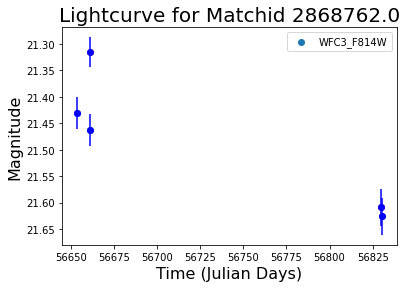

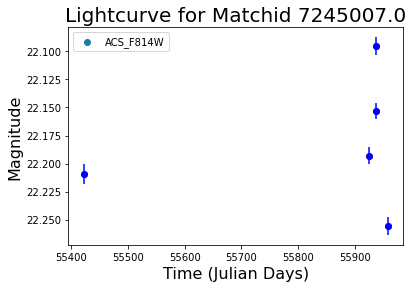

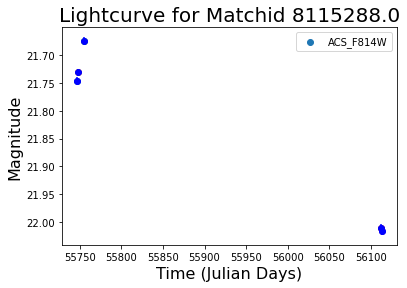

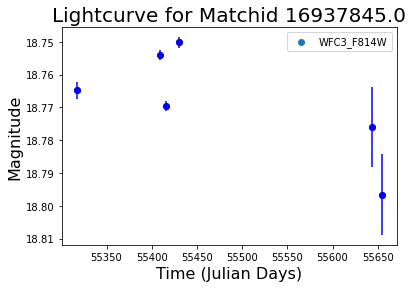

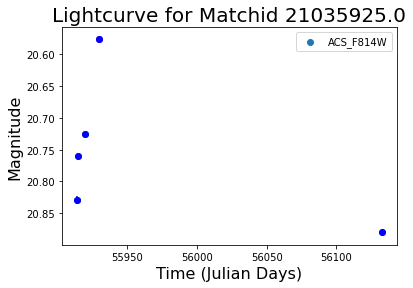

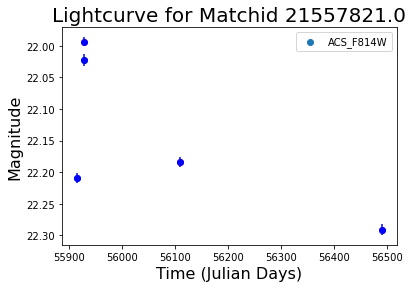

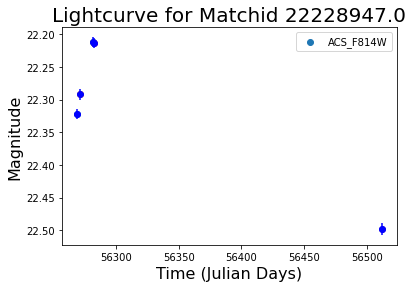

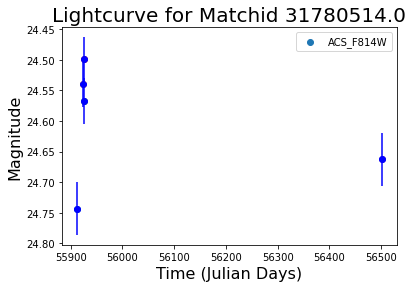

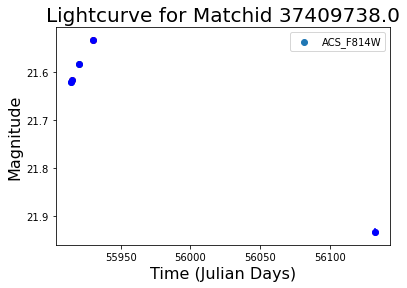

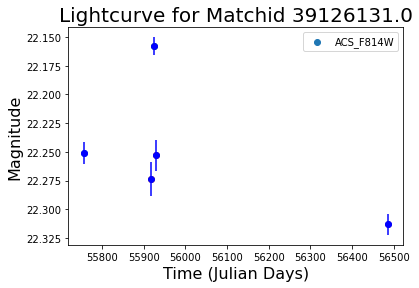

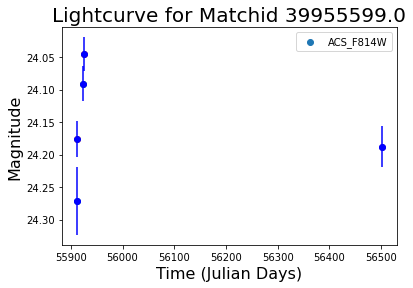

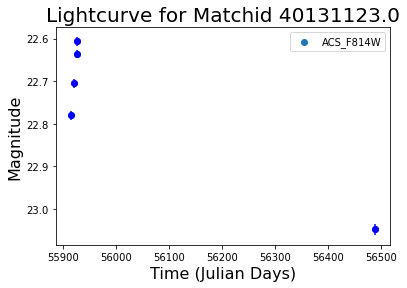

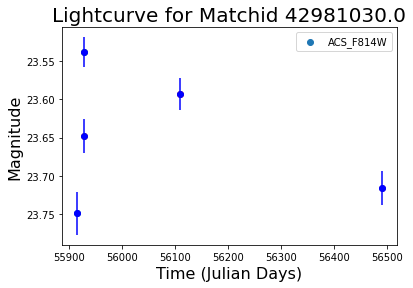

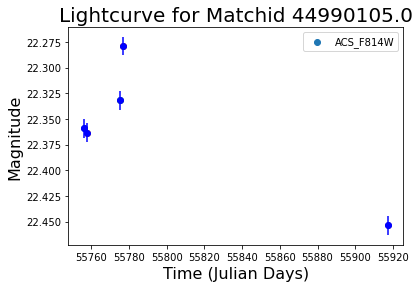

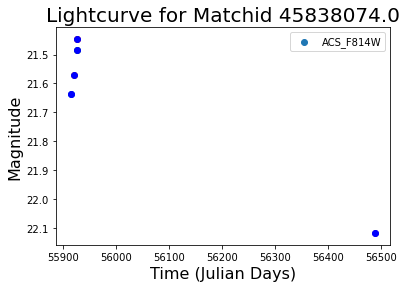

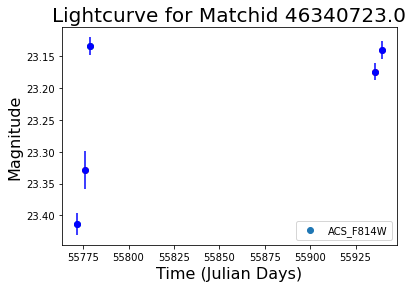

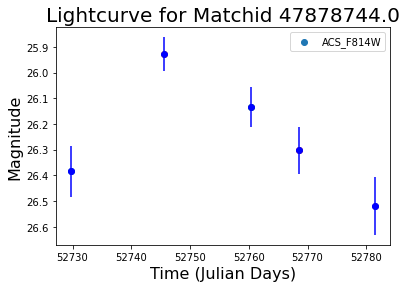

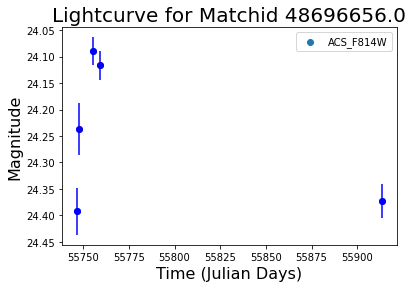

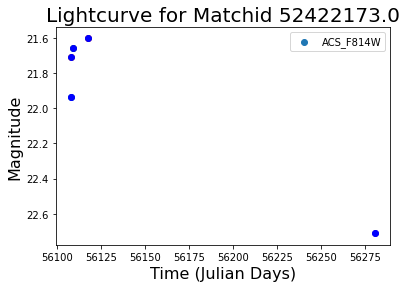

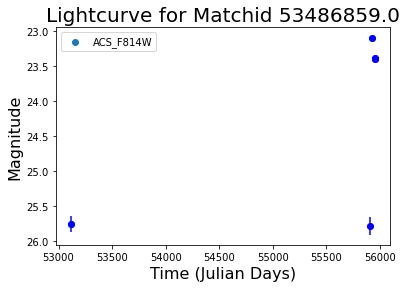

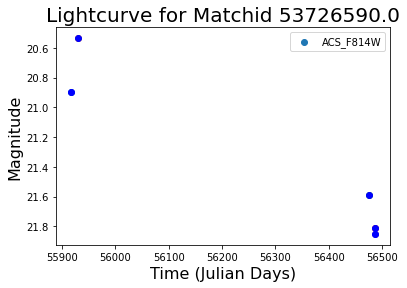

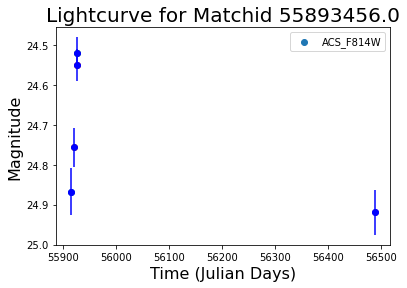

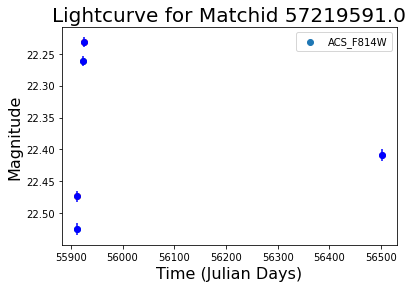

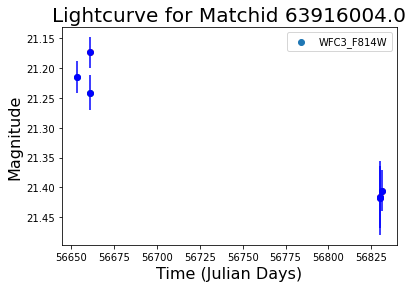

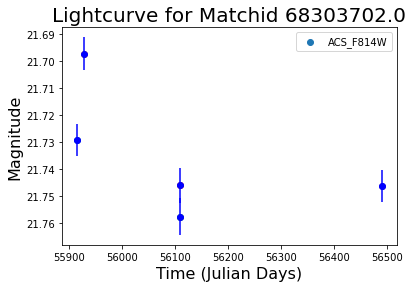

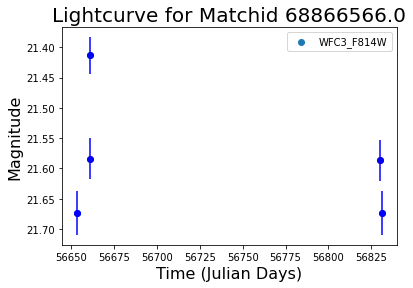

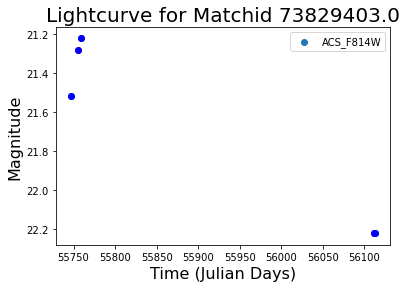

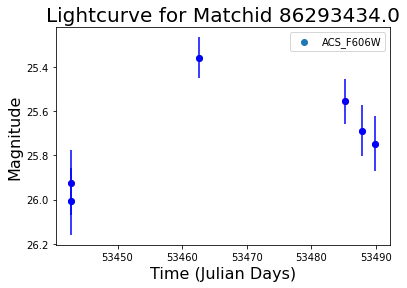

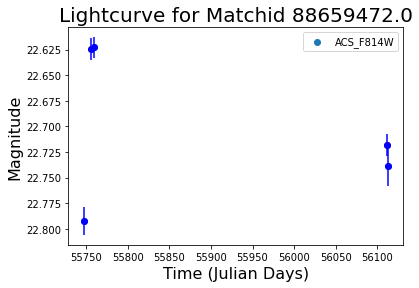

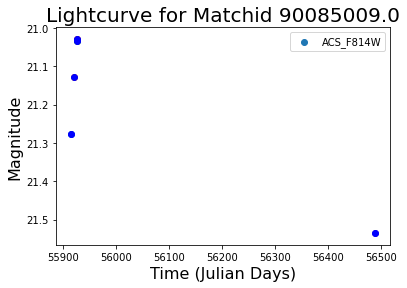

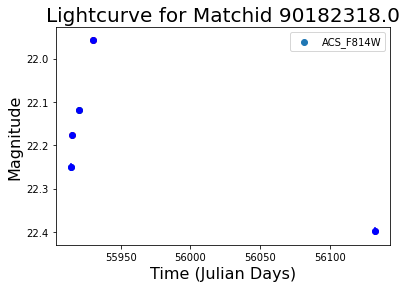

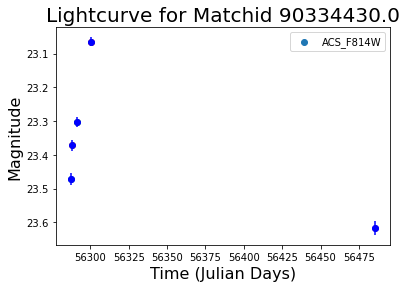

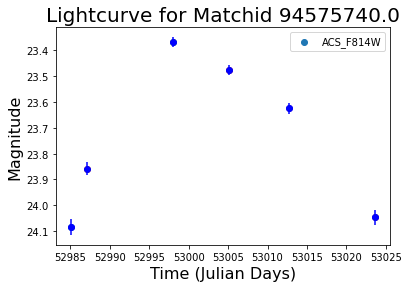

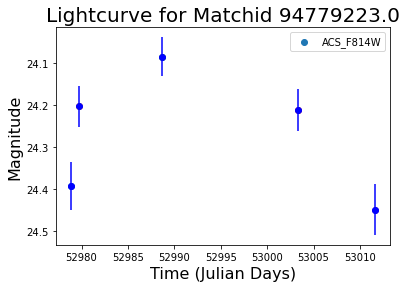

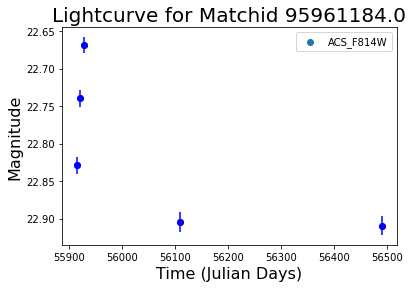

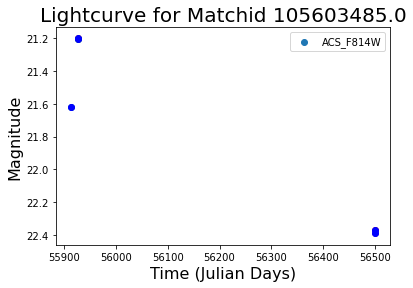

In [64]:
plot_candidates(r4_monster_matrix_simple)